In [2]:
from importlib import import_module

In [3]:
from snntoolbox.parsing.utils import *

Using TensorFlow backend.
/home/wolin/.conda/envs/tf2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/wolin/.conda/envs/tf2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/wolin/.conda/envs/tf2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/wolin/.conda/envs/tf2/lib/python3.7

In [4]:
from snntoolbox.parsing.model_libs.keras_input_lib import *

In [5]:
from snntoolbox.bin.utils import update_setup

In [6]:
from os import *

In [7]:
model_path = "/home/wolin/snn_toolbox/examples/models/lenet5/keras/"

In [8]:
config = update_setup(model_path + "config")







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

SNN toolbox Warning: Currently, turning off Poisson input is
only possible in INI simulator. Falling back on Poisson input.


/home/wolin/.conda/envs/tf2/lib/python3.7/site-packages/keras/utils/conv_utils.py:93: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.copy(kernel[slices])


Load the network from file and parse it

In [9]:
model = "98.96"

In [10]:
config

In [11]:
n = load(model_path, model)

/home/wolin/.conda/envs/tf2/lib/python3.7/site-packages/keras/utils/conv_utils.py:93: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.copy(kernel[slices])


In [12]:
mp = ModelParser(n['model'], config)

In [13]:
mp.parse()

Parsing layer Conv2D.
Using activation relu.
Parsing layer MaxPooling2D.
Parsing layer Conv2D.
Using activation relu.
Parsing layer MaxPooling2D.
Skipping layer Dropout.
Parsing layer Conv2D.
Using activation relu.
Parsing layer Flatten.
Parsing layer Dense.
Using activation relu.
Parsing layer Dense.
Using activation softmax.



In [14]:
pm = mp.build_parsed_model()

Building parsed model...

Compiling parsed model...



In [15]:
pm

In [16]:
from snntoolbox.conversion.utils import normalize_parameters

In [17]:
from snntoolbox.datasets.utils import get_dataset

Load the data and use it to normalize the activations

In [18]:
normset, testset = get_dataset(config)

Loading scale factors from disk instead of recalculating.
Loading data set from '.npz' files in /home/wolin/snn_toolbox/examples/datasets/mnist.



In [19]:
normalize_parameters(pm, config, **normset)

Normalizing parameters...
Using scale factor 1.00 for softmax layer.
Plotting distributions of weights and activations before and after normalizing...
Loading activations stored during a previous run.
Loading activations stored during a previous run.
Loading activations stored during a previous run.
Loading activations stored during a previous run.
Loading activations stored during a previous run.



In [20]:
pm

In [21]:
from snntoolbox.simulation.utils import *

In [22]:
from snntoolbox.simulation.target_simulators.brian2_target_sim import *

In [23]:
def import_target_sim(config):

    sim_str = config.get('simulation', 'simulator')
    code_str = '_' + config.get('conversion', 'spike_code') \
        if sim_str == 'INI' else ''

    return import_module('snntoolbox.simulation.target_simulators.'
                         + sim_str + code_str + '_target_sim')

In [24]:
target_sim = import_target_sim(config)

In [25]:
target_sim

<module 'snntoolbox.simulation.target_simulators.brian2_target_sim' from '/home/wolin/snn_toolbox/snntoolbox/simulation/target_simulators/brian2_target_sim.py'>

In [26]:
spiking_model = target_sim.SNN(config, None)

Initializing brian2 simulator...



In [27]:
spiking_model.build(pm)

WARNING    /home/wolin/.conda/envs/tf2/lib/python3.7/site-packages/keras/utils/conv_utils.py:93: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.copy(kernel[slices])
 [py.warnings]


Building spiking model...
Building layer: 00Conv2D_6x24x24
Adding fixed Conv layer synapses
......

WARNING    /home/wolin/snn_toolbox/snntoolbox/simulation/target_simulators/brian2_target_sim.py:371: RuntimeWarning: Biases not implemented.
  warnings.warn("Biases not implemented.", RuntimeWarning)
 [py.warnings]



Connecting layer...
Building layer: 01MaxPooling2D_6x12x12
Adding STDP synapse layer...


WARNING    /home/wolin/snn_toolbox/snntoolbox/simulation/utils.py:1241: RuntimeWarning: Layer type 'MaxPooling' not supported yet. Falling back on 'AveragePooling'.
  "Falling back on 'AveragePooling'.", RuntimeWarning)
 [py.warnings]


......
Building layer: 02Conv2D_16x8x8
Adding fixed Conv layer synapses
................
Connecting layer...
Building layer: 03MaxPooling2D_16x4x4
Adding STDP synapse layer...
................
Building layer: 04Conv2D_120x4x4
Adding fixed Conv layer synapses
........................................................................................................................
Connecting layer...
Building layer: 05Flatten_1920
Building layer: 06Dense_84
Adding STDP synapse layer...
Lenght of weights:161280
Building layer: 07Dense_10
Adding STDP synapse layer...
Lenght of weights:840
Compiling spiking model...

Detected layer with biases: 00Conv2D_6x24x24
Detected layer with biases: 02Conv2D_16x8x8
Detected layer with biases: 04Conv2D_120x4x4
Detected layer with biases: 06Dense_84
Detected layer with biases: 07Dense_10
Number of operations of ANN: 2346734
Number of neurons: 7614
Number of synapses: 1397800



In [28]:
def run(snn, **test_set):
    return snn.run(**test_set)

In [30]:
spiking_model.save(model_path, model)

Saving weights ...
Store weights of layer 00Conv2D_6x24x24 to file /home/wolin/snn_toolbox/examples/models/lenet5/keras/98.96_brian2/brian2-model/00Conv2D_6x24x24.npz
Store weights of layer 01MaxPooling2D_6x12x12 to file /home/wolin/snn_toolbox/examples/models/lenet5/keras/98.96_brian2/brian2-model/01MaxPooling2D_6x12x12.npz
Store weights of layer 02Conv2D_16x8x8 to file /home/wolin/snn_toolbox/examples/models/lenet5/keras/98.96_brian2/brian2-model/02Conv2D_16x8x8.npz
Store weights of layer 03MaxPooling2D_16x4x4 to file /home/wolin/snn_toolbox/examples/models/lenet5/keras/98.96_brian2/brian2-model/03MaxPooling2D_16x4x4.npz
Store weights of layer 04Conv2D_120x4x4 to file /home/wolin/snn_toolbox/examples/models/lenet5/keras/98.96_brian2/brian2-model/04Conv2D_120x4x4.npz
Store weights of layer 06Dense_84 to file /home/wolin/snn_toolbox/examples/models/lenet5/keras/98.96_brian2/brian2-model/06Dense_84.npz
Store weights of layer 07Dense_10 to file /home/wolin/snn_toolbox/examples/models/len

In [1]:
def collect_weights(spiking_model):
    weights = []
    for layer in spiking_model.connections:
        weights.append(np.copy(layer.w))
        
    return weights

In [30]:
w0 = collect_weights(spiking_model)

In [31]:
w0

[array([ 0.11287836,  0.04906896,  0.23412429, ..., -0.06220969,
        -0.05889574, -0.15978634]),
 array([0.25, 0.25, 0.25, ..., 0.25, 0.25, 0.25]),
 array([ 0.06592897,  0.03418881, -0.03738239, ..., -0.01008252,
         0.08639906, -0.00747718]),
 array([0.25, 0.25, 0.25, ..., 0.25, 0.25, 0.25]),
 array([-0.03047717,  0.01281271, -0.02755789, ...,  0.0972652 ,
        -0.10265802, -0.16350664]),
 array([-0.01206891,  0.00671051,  0.00322337, ..., -0.00020613,
        -0.06115219,  0.00049086]),
 array([ 5.98508179e-01, -1.00004375e+00,  1.10089612e+00,  2.96843886e+00,
        -1.90304831e-01, -1.94159269e-01, -2.68824410e+00,  6.85738444e-01,
        -2.04456139e+00, -3.32433558e+00,  6.15141928e-01,  2.21534276e+00,
         1.92379951e+00,  4.69232887e-01,  2.51933843e-01,  2.09928274e+00,
        -1.82165265e+00,  1.14316154e+00, -1.22634363e+00,  9.71844018e-01,
        -2.87610936e+00, -9.78852868e-01, -1.90061116e+00,  1.70658016e+00,
         2.32846332e+00,  1.07052699e-


Starting new simulation...

Current accuracy of batch:


WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. 8 lines of abstract code, first line is: "_Apre := Apre * exp(_lio_1 * (- (t - lastupdate))) (constant)"
 [brian2.codegen.generators.base]
WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. 8 lines of abstract code, first line is: "_Apre := Apre * exp(_lio_1 * (- (t - lastupdate))) (constant)"
 [brian2.codegen.generators.base]
WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. 8 lines of abstract code, first line is: "_Apre := Apre * exp(_lio_1 * (- 

Starting simulation at t=0. s for a duration of 100. ms
0.001 (1%) simulated in < 1s, estimated 2s remaining.
0.004 (4%) simulated in < 1s, estimated 1s remaining.
0.006 (6%) simulated in < 1s, estimated 1s remaining.
0.008 (8%) simulated in < 1s, estimated 1s remaining.
0.01 (10%) simulated in < 1s, estimated 1s remaining.
0.012 (12%) simulated in < 1s, estimated 1s remaining.
0.013999999999999999 (13%) simulated in < 1s, estimated 1s remaining.
0.016 (16%) simulated in < 1s, estimated 1s remaining.
0.018000000000000002 (18%) simulated in < 1s, estimated 1s remaining.
0.021 (21%) simulated in < 1s, estimated 1s remaining.
0.023 (23%) simulated in < 1s, estimated 1s remaining.
0.025 (25%) simulated in < 1s, estimated 1s remaining.
0.026999999999999996 (26%) simulated in < 1s, estimated 1s remaining.
0.028999999999999998 (28%) simulated in < 1s, estimated 1s remaining.
0.031 (31%) simulated in < 1s, estimated 1s remaining.
0.033 (33%) simulated in < 1s, estimated 1s remaining.
0.035 (35

WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. 8 lines of abstract code, first line is: "_Apre := Apre * exp(_lio_1 * (- (t - lastupdate))) (constant)"
 [brian2.codegen.generators.base]
WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. 8 lines of abstract code, first line is: "_Apre := Apre * exp(_lio_1 * (- (t - lastupdate))) (constant)"
 [brian2.codegen.generators.base]
WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. 8 lines of abstract code, first line is: "_Apre := Apre * exp(_lio_1 * (- 

Starting simulation at t=0. s for a duration of 100. ms
0.004 (4%) simulated in < 1s, estimated 1s remaining.
0.006 (6%) simulated in < 1s, estimated 1s remaining.
0.017 (17%) simulated in < 1s, estimated < 1s remaining.
0.02 (20%) simulated in < 1s, estimated < 1s remaining.
0.022 (21%) simulated in < 1s, estimated < 1s remaining.
0.031 (31%) simulated in < 1s, estimated < 1s remaining.
0.033 (33%) simulated in < 1s, estimated < 1s remaining.
0.037 (36%) simulated in < 1s, estimated < 1s remaining.
0.039 (38%) simulated in < 1s, estimated < 1s remaining.
0.044 (43%) simulated in < 1s, estimated < 1s remaining.
0.047 (47%) simulated in < 1s, estimated < 1s remaining.
0.049 (49%) simulated in < 1s, estimated < 1s remaining.
0.059 (59%) simulated in < 1s, estimated < 1s remaining.
0.062 (62%) simulated in < 1s, estimated < 1s remaining.
0.064 (64%) simulated in < 1s, estimated < 1s remaining.
0.07 (70%) simulated in < 1s, estimated < 1s remaining.
0.07200000000000001 (72%) simulated in <

KeyboardInterrupt: 

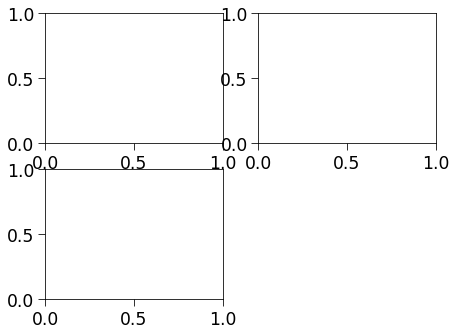

In [32]:
results = run(spiking_model, **testset)

In [33]:
w1 = collect_weights(spiking_model)

In [37]:
w0[-1]

array([ 5.98508179e-01, -1.00004375e+00,  1.10089612e+00,  2.96843886e+00,
       -1.90304831e-01, -1.94159269e-01, -2.68824410e+00,  6.85738444e-01,
       -2.04456139e+00, -3.32433558e+00,  6.15141928e-01,  2.21534276e+00,
        1.92379951e+00,  4.69232887e-01,  2.51933843e-01,  2.09928274e+00,
       -1.82165265e+00,  1.14316154e+00, -1.22634363e+00,  9.71844018e-01,
       -2.87610936e+00, -9.78852868e-01, -1.90061116e+00,  1.70658016e+00,
        2.32846332e+00,  1.07052699e-01, -4.62841749e+00,  8.53051364e-01,
        2.22856379e+00,  2.33956718e+00, -3.92668152e+00,  2.38365364e+00,
        8.11869621e-01, -3.19189692e+00,  2.62530112e+00,  1.88243723e+00,
        7.83199489e-01, -1.13044333e+00,  1.77596748e-01, -2.75086784e+00,
       -7.44816720e-01, -1.57960296e+00, -6.42866611e-01, -8.96511674e-01,
        3.90796691e-01,  2.56708789e+00, -6.19642675e-01,  2.20311451e+00,
        2.48695895e-01,  2.04342508e+00,  1.70628309e+00,  2.94874668e+00,
       -4.21216345e+00, -

In [38]:
w1[-1]

array([ 5.98508179e-01, -1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
       -1.90304831e-01, -1.94159269e-01, -1.00000000e+00,  6.85738444e-01,
       -1.00000000e+00, -1.00000000e+00,  6.15141928e-01,  1.00000000e+00,
        1.00000000e+00,  4.69232887e-01,  2.51933843e-01,  2.09928274e+00,
       -1.00000000e+00,  1.00000000e+00, -1.22634363e+00,  9.71844018e-01,
       -1.00000000e+00, -9.78852868e-01, -1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.07052699e-01, -1.00000000e+00,  8.53051364e-01,
        2.22856379e+00,  2.33956718e+00, -1.00000000e+00,  1.00000000e+00,
        8.11869621e-01, -1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        7.83199489e-01, -1.00000000e+00,  1.77596748e-01, -1.00000000e+00,
       -7.44816720e-01, -1.00000000e+00, -6.42866611e-01, -8.96511674e-01,
        3.90796691e-01,  2.56708789e+00, -6.19642675e-01,  1.00000000e+00,
        2.48695895e-01,  2.04342508e+00,  1.00000000e+00,  1.00000000e+00,
       -1.00000000e+00, -

In [41]:
np.sum(np.subtract(w0[-1], w1[-1]))

-240.19796431064606

In [35]:
import numpy as np

In [36]:
[np.sum(w1[i] - w0[i]) for i in range(5)]

[0.0, 0.0, 0.0, 0.0, 0.0]

In [33]:
testset['x_test'].shape

(10, 1, 28, 28)

In [ ]:
testset['y_test']